### Que: Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df1 = df.iloc[:,1:]
df1.head(3)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)
df1_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [5]:
df2 = pd.DataFrame(df1_scaled)
df2.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [6]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

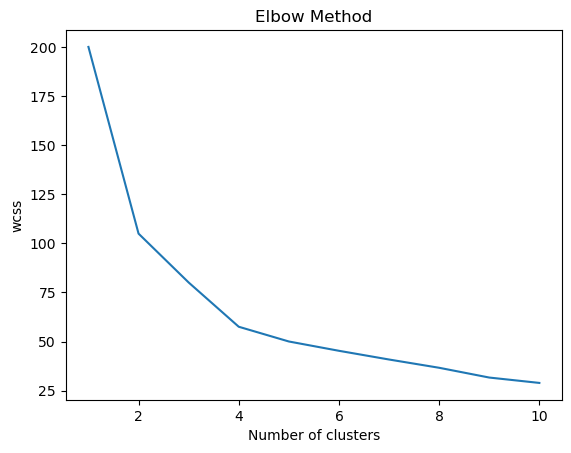

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

In [9]:
kmeans = KMeans(n_clusters=4)
predict = kmeans.fit_predict(df1)

C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
predict

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2])

In [11]:
print(pd.Series(predict).value_counts())

1    16
2    14
0    10
3    10
dtype: int64


In [12]:
from sklearn.cluster import DBSCAN

In [13]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [14]:
dbscan.fit(df1)

DBSCAN()

In [15]:
dbscan_labels = dbscan.labels_

In [16]:
print(pd.Series(dbscan_labels).value_counts())

-1    50
dtype: int64


In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df1_scaled)


C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo-PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'K-means Clustering')

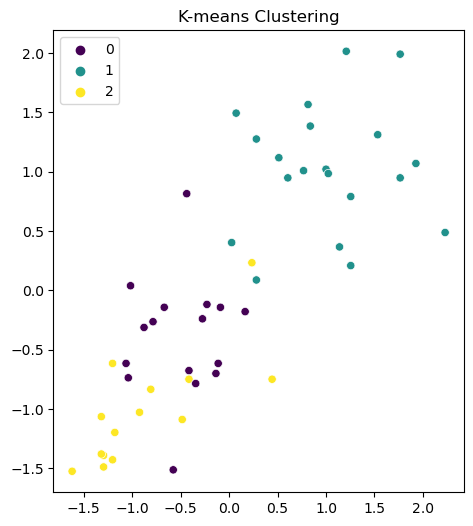

In [27]:
import seaborn as sns
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df1_scaled [:, 0], y=df1_scaled [:, 1], hue=kmeans_labels, palette='viridis', legend='full')
plt.title('K-means Clustering')

In [28]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(df1_scaled)

Text(0.5, 1.0, 'K-means Clustering')

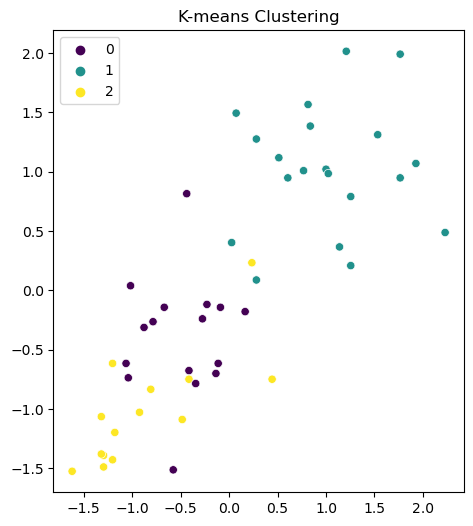

In [30]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df1_scaled[:, 0], y=df1_scaled[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
plt.title('K-means Clustering')


Text(0.5, 1.0, 'DBSCAN Clustering')

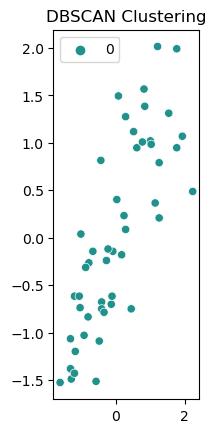

In [31]:
plt.subplot(1, 3, 2)
sns.scatterplot(x=df1_scaled[:, 0], y=df1_scaled[:, 1], hue=dbscan_labels, palette='viridis', legend='full')
plt.title('DBSCAN Clustering')

C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_2268\1379945435.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df1_scaled[:, 0], y=df1_scaled[:, 1], palette='viridis')


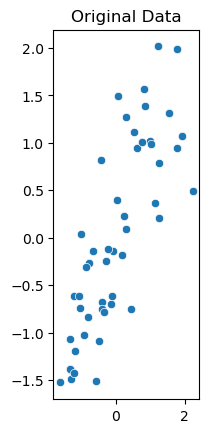

In [35]:
plt.subplot(1, 3, 3)
sns.scatterplot(x=df1_scaled[:, 0], y=df1_scaled[:, 1], palette='viridis')
plt.title('Original Data')

plt.show()

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [18]:
linkage_matrix = linkage(df1_scaled, method='ward')

In [19]:
import matplotlib.pyplot as plt

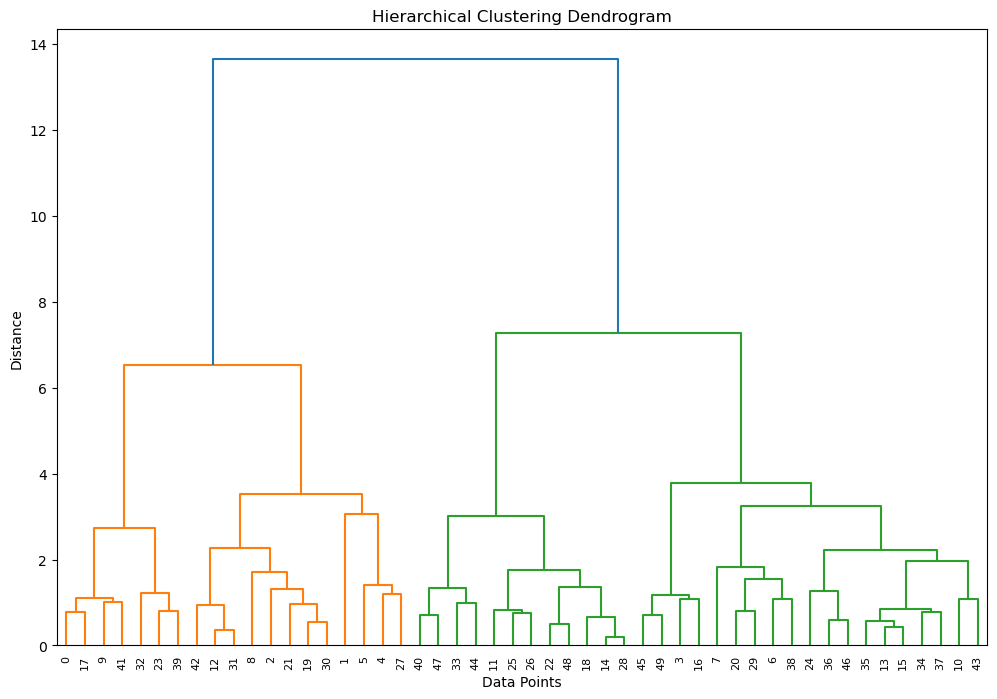

In [20]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


### insights:

* The dendrogram provides insights into the hierarchical relationships between data points. Vertical lines represent       clusters, and the height of the vertical lines indicates the distance at which clusters are merged.


* Based on the elbow method, we chose three clusters (k=3) for K-means clustering.

* The scatterplot shows how data points are grouped into three clusters based on their features.
  For example, there are specific regions or types of areas that tend to have similar crime rates.


* The scatterplot visualizes the clusters identified by DBSCAN. Outliers are labeled as -1.
  Check if there are any dense regions or outliers that might represent specific patterns or anomalies.


* The scatterplot of the original data shows the distribution of crime data points without clustering.
